<a href="https://colab.research.google.com/github/RodrigoEche/00_CoderHouseProyecto/blob/main/Entrega_1_Proyecto_Final_DS_CoderHouse_Rodrigo_Echegoyemberry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  -----------------------------------------------------------------------------------------------------------------------
# |                                                                                                                       |
# |         ENTREGA 1 DE PROYECTO FINAL
# |                                                                                                                       |
#  -----------------------------------------------------------------------------------------------------------------------

# ** RESOLUCIÓN DE UN CASO DE DATA SCIENCE **








# 0. INTRODUCCIÓN, MOTIVACIÓN Y AUDIENCIA

### Para lo desafíos de Coderhouse busqué varios datasets principalmente en Kaggle de distintos tipos o áreas de interés. Eligiendo finalmente éste de ventas de artículos deportivos relacionados con el ciclismo. La motivación principal para hacerlos es que tratándose de ventas me pareció lo más estándar y fácil para hacer un análisis y entonces poder contar con una estructura o esqueleto que me permita ir adquiriendo conocimientos de Data Science gradualmente y con pasos firmes. A pesar de que las ventas nunca me gustaron y nunca hubiera elegido este dataset por haberme parecido a priori aburridisimo, me propongo aprender cosas nuevas y dotarme de herramientas concretas para las que seguramente hay mayor demanda laboral. Mis otras busquedas de datasets tenían que ver con recorridos de los rovers en Marte o recuento de exoplanetas, muy interesantes para mi pero creo que no  podrían tener un destino práctico como es el de aprender sin reinventar la rueda. La audiencia de interés para este trabajo es muy amplia dado que el comercio de articulos es tan viejo como la humanidad, especialmente podría ser de interés para el Dpto Comercial si lo tuviera este negocio o directamente ambos dueños emprendedores (así supuse para contextualizar el dataset).

# 1. OBJETIVOS

##  Encontrar las causas de porqué el negocio de ventas de artículos de ciclismo esta marchando muy mal.
##  Proponer una solución urgente que permita continuar con el negocio


# 2. CONTEXTO COMERCIAL

## El dataset elegido contiene las **ventas de artículos** deportivos relacionados con el **ciclismo**. Dichas ventas se realizan por internet. Supuestos: el emprendimiento lo inició un matrimonio sin experiencia en negocios pero muy entusiastas del ciclismo. Encontraron que si bien tienen muchas ventas, a distintos países y les compra gente de todas las edades, el negocio no les está dando las ganancias que esperaban y necesitan confirmar si ésto es así. Con la esperanzas de continuar el negocio contratan a un Data Scientist y le solicitan realizar visualizaciones que les permitan comprender y sobre todo encontrar las causas de porqué marcha mal el negocio y les urge encontrar soluciones o recibir recomendaciones.

# **Insigths**
## El insight más importante, que en realidad fué un verdadero hallazgo,  se hizo evidente con el gráfico de dispersión mostrado casi al final que vincula precio de venta con costo del producto. En ese gráfico se detalla dicho hallazgo, y explica porqué al negocio no le vá bien a pesar de vender muchos productos incluso a  países que constituyen un  buen mercado.

# 3. PROBLEMA COMERCIAL

#### 1. ¿A que período de tiempo corresponde y qué granularidad?
#### 2. ¿Que tipo de productos se venden?
#### 3. ¿A que país o región se vende más?
#### 4. ¿Existe estacionalidad en las ventas de artículos?
#### 5. ¿Existe una diferencia de ventas según el género?
#### 6. ¿Existe una diferencia de ventas según la edad?
#### 7. ¿Cuales son los costos y ganancias totales?
#### 8. ¿Cuales son los costos y ganancias discriminados por producto?
#### 9. ¿La venta de qué producto produce más ganancias?
#### 10. ¿Qué estrategia podría seguirse para vender más ese producto?
#### 11. ¿Hay mucho o poco surtido de productos? ¿Convendrá diversificar la oferta?

# 4. CONTEXTO ANALÍTICO

Se cuenta con un dataset descargado de Kaggle, que registran las ventas de artículos de ciclismo, con detalle de ventas y comprador como fechas, país, género, edad, categorías del producto y detalles del costo y precio de venta de cada artículo. El dataset se provee en formato .CSV con la coma como separador estandar.

### Importación de librerías

In [ ]:
# importacion de librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Ruta al dataset en GitHub

In [ ]:
# rutas de acceso a datasets en mi drive
dataset1 = '/content/drive/MyDrive/DS/salesforcourse-4fe2kehu.csv'

# rutas de acceso a datasets en mi GitHub repositorio publico
dataset1 = 'https://raw.githubusercontent.com/RodrigoEche/DS_Datasets/main/1%20Sales%20Data%20for%20Economic%20Data%20Analysis/Sales%20Data%20for%20Economic%20Data%20Analysis%20Kaggle/salesforcourse-4fe2kehu.csv'



## Descripción del dataset: diccionario

In [ ]:
'''-----------------------------------------------------------------------------------------------------------------------
Archivo:                salesforcourse-4fe2kehu.csv
Descargado de:          https://www.kaggle.com/datasets/abhishekrp1517/sales-data-for-economic-data-analysis
Area:                   Ventas de productos
Filas y columnas:       (34867, 16)
Atributos o columnas:   ['index', 'Date', 'Year', 'Month', 'Customer Age', 'Customer Gender',
                            'Country', 'State', 'Product Category', 'Sub Category', 'Quantity',
                                        'Unit Cost', 'Unit Price', 'Cost', 'Revenue', 'Column1']
Variables interesantes:
                      Date:                   para analizar evolucion de ventas o estacionalidad
                      Edad/Genero consumidor: para ver preferencias de consumo segun rango etario y genero
                      Pais/estado:            para analizar donde se vende mas o menos y definir una estrategia
                      Costo/precio/cantidad:  para cuantificar ventas, ingresos, costos y analizar rentabilidad                                                                                                |
-----------------------------------------------------------------------------------------------------------------------'''

"-----------------------------------------------------------------------------------------------------------------------\nArchivo:                salesforcourse-4fe2kehu.csv\nDescargado de:          https://www.kaggle.com/datasets/abhishekrp1517/sales-data-for-economic-data-analysis\nArea:                   Ventas de productos\nFilas y columnas:       (34867, 16)\nAtributos o columnas:   ['index', 'Date', 'Year', 'Month', 'Customer Age', 'Customer Gender',\n                            'Country', 'State', 'Product Category', 'Sub Category', 'Quantity',\n                                        'Unit Cost', 'Unit Price', 'Cost', 'Revenue', 'Column1']\nVariables interesantes:\n                      Date:                   para analizar evolucion de ventas o estacionalidad\n                      Edad/Genero consumidor: para ver preferencias de consumo segun rango etario y genero\n                      Pais/estado:            para analizar donde se vende mas o menos y definir una estrategia\

## Lectura del dataset

In [ ]:
# lectura del dataset
df= pd.read_csv( dataset1, sep=',')

# vista y verificacion
print(f' Dataset: {dataset1[-28:]}'                   ,'')
print(f'\n Renglones y columnas: {df.shape} '         ,'\n')
df.head(3)
df.iloc[[0,10,1000,2000]]
#df=df.head(100)

 Dataset: /salesforcourse-4fe2kehu.csv 

 Renglones y columnas: (34867, 16)  



,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.0,109.0,80.0,109.0,NaN
10,10,6/24/2016,2016.0,June,29.0,F,United States,Washington,Accessories,Helmets,2.0,17.5,21.0,35.0,42.0,NaN
1000,1000,9/9/2015,2015.0,September,49.0,F,France,Hauts de Seine,Bikes,Touring Bikes,2.0,371.0,498.5,742.0,997.0,214.0
2000,2000,7/9/2015,2015.0,July,30.0,M,United States,California,Accessories,Bottles and Cages,2.0,20.0,23.5,40.0,47.0,346.0


## Limpieza (borrado de columna y fila basuras)

In [ ]:
# Un poco de limpieza del df (ejecutar solo una vez para que no intente borrar algo ya borrado)
df = df.drop('Column1',     axis=1) #elimino una columna basura 'Column1'
df = df.drop(df.index[-1],  axis=0) #elimino ultimo renglon basura lleno de NaN
print(' Se limpio un poco el df, se borra ultima columna y ultima fila, quedando:')
print(f'\n Renglones y columnas: {df.shape} '         ,'\n')
df.head(3)

 Se limpio un poco el df, se borra ultima columna y ultima fila, quedando:

 Renglones y columnas: (34866, 15)  



,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.0,80.0,109.0
1,1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.5,49.0,57.0
2,2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.0,11.0,15.0


## Acondicionado de columnas de fechas o períodos

In [ ]:
# Acondiciono la columna 'Date'  a formato de fecha
df['Date'] = pd.to_datetime(df['Date'])

# Fuerzo a la columna Month a que sea el numero del mes porque los graficos con eje x tiempo sino muestran desordenados los meses
mes = {'January': 1, 'February': 2,   'March': 3,       'April': 4,     'May': 5,         'June': 6,
       'July': 7,    'August': 8,     'September': 9,   'October': 10,  'November': 11,   'December': 12  }

df['Month'] = df['Month'].map(mes)


In [ ]:
df.head(3)
#df.tail(3)


,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,0,2016-02-19,2016.0,2,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.0,80.0,109.0
1,1,2016-02-20,2016.0,2,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.5,49.0,57.0
2,2,2016-02-27,2016.0,2,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.0,11.0,15.0


## Columnas categóricas

In [ ]:
# Identificar columnas categoricas
categoricas = df.select_dtypes(include=['object'])
print('Salida de df.select_dtypes(include=[object]):\n-------------------------------')
print(f'\n Renglones y columnas: {categoricas.shape} '         ,'\n')

categoricas.head(3)

Salida de df.select_dtypes(include=[object]):
-------------------------------

 Renglones y columnas: (34866, 5)  



,Customer Gender,Country,State,Product Category,Sub Category
0,F,United States,Washington,Accessories,Tires and Tubes
1,F,United States,Washington,Clothing,Gloves
2,F,United States,Washington,Accessories,Tires and Tubes


In [ ]:
# Conociendo las columnas categoricas
print('Salida de df.info():\n-------------------------------------------------------\n')
print(df.info(),'\n')

print('Salida de df[Categoria].value_counts():\n-------------------------------------------------------\n')
print(df['Year'].value_counts(),'\n')
print(df['Month'].value_counts(),'\n')
print(df['Country'].value_counts(),'\n')
print(df['Customer Gender'].value_counts(),'\n')
print(df['Product Category'].value_counts(),'\n')
print(df['Sub Category'].value_counts(),'\n')


Salida de df.info():
-------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34866 entries, 0 to 34865
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             34866 non-null  int64         
 1   Date              34866 non-null  datetime64[ns]
 2   Year              34866 non-null  float64       
 3   Month             34866 non-null  int64         
 4   Customer Age      34866 non-null  float64       
 5   Customer Gender   34866 non-null  object        
 6   Country           34866 non-null  object        
 7   State             34866 non-null  object        
 8   Product Category  34866 non-null  object        
 9   Sub Category      34866 non-null  object        
 10  Quantity          34866 non-null  float64       
 11  Unit Cost         34866 non-null  float64       
 12  Unit Price        34866 non-null  float64       
 13

## Columnas numéricas

In [ ]:
# Conociendo las columnas numericas
df.describe().round(2)



,index,Year,Month,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue
count,34866.00,34866.00,34866.00,34866.00,34866.00,34866.00,34866.00,34866.0,34866.00
mean,17432.50,2015.57,6.32,36.38,2.00,349.88,389.23,576.0,640.87
std,10065.09,0.50,3.47,11.11,0.81,490.02,525.32,690.5,736.65
min,0.00,2015.00,1.00,17.00,1.00,0.67,0.67,2.0,2.00
25%,8716.25,2015.00,3.00,28.00,1.00,45.00,53.67,85.0,102.00
50%,17432.50,2016.00,6.00,35.00,2.00,150.00,179.00,261.0,319.00
75%,26148.75,2016.00,9.00,44.00,3.00,455.00,521.00,769.0,902.00
max,34865.00,2016.00,12.00,87.00,3.00,3240.00,5082.00,3600.0,5082.00


# 5. ANÁLISIS EXPLORATORIO DE DATOS (EDA)

## Gráfico de evolución mensual de ventas

#### INSIGHTS: en Junio y Julio de 2015 los ingresos por ventas muestran un crecimiento abrupto, lo mismo se observa en Diciembre de 2015 dando un pico, evidencia un comportamiento estacional del negocio.En Julio de 2016 se observa la aparente caida da los ingresos pero lo atribuyo a que faltan los datos del periodo completo dado que ahí termina el grafico.

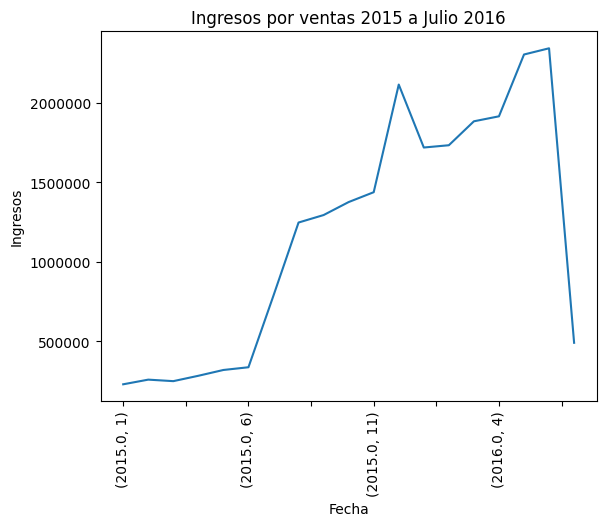

In [ ]:
# GRAFICO DE LINEAS: .plot()
# Agrupo las ventas por mes y año y calcular la suma de las ventas en cada periodo
ventas_por_mes = df.groupby(['Year', 'Month'])['Revenue'].sum()

#print(ventas_por_mes.shape) #print(ventas_por_mes) #print(ventas_por_mes.index)
# Gráfico de línea
ventas_por_mes.plot()

#plt.plot(ventas_por_mes.index, ventas_por_mes.values)
plt.title('Ingresos por ventas 2015 a Julio 2016');
plt.ylabel('Ingresos');  plt.xlabel('Fecha');
plt.ticklabel_format(style='plain', axis='y') # Desactiva la notación científica en el eje y
plt.xticks(rotation=90); plt.show()

# Gráfico de barras ventas por país
#### INSIGHTS: permite ver que el país que genera más ganancias por ventas es Estados Unidos y que los compradores viven en países considerados un buen mercado. Sigue latente la pregunta de porque le vá mal al negocio vendiendole a países que constituyen un buen mercado.

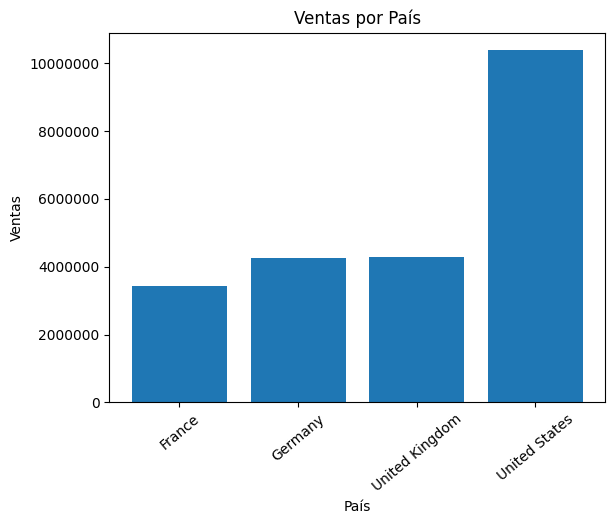

In [ ]:
# Agrupo las ventas por país y calculo la suma de las ventas en cada país
ventas_por_pais = df.groupby('Country')['Revenue'].sum()

# Crear el gráfico de barras
plt.bar(ventas_por_pais.index, ventas_por_pais.values)

plt.ticklabel_format(style='plain', axis='y') # Desactiva la notación científica en el eje y
plt.xlabel('País')
plt.ylabel('Ventas')
plt.title('Ventas por País')
plt.xticks(rotation=40)
plt.show()

# Gráfico de dispersión entre variable Edad y Precio del producto.

#### INSIGHTS: debido a la distribucíon con alta dispersión de valores se evidencia que no existe ninguna relación entre la edad del cliente y el precio que esta dispuesto a pagar por uno de los productos. Es decir no existe una tendencia o preferencia relacionado con la edad.

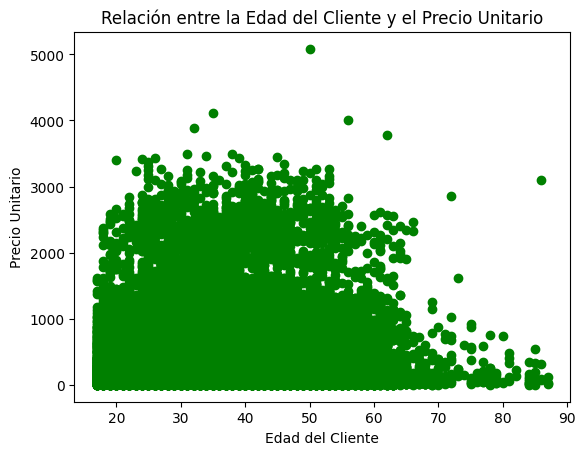

In [ ]:
plt.scatter(df['Customer Age'], df['Unit Price'],color='g')
plt.title('Relación entre la Edad del Cliente y el Precio Unitario')
plt.ylabel('Precio Unitario');    plt.xlabel('Edad del Cliente');
plt.show()

# Gráfico de dispersión entre variable Precio de venta y Costo del producto

# **Insigth más importante**



#### A primera vista se encuentra una relación entre costo y precio de venta del producto, aumenta el costo aumenta el precio a que se vende. Pero lo importante en este caso y ese es el hallazgo mas importante son los valores a que se compra y se vende. Esta gráfica de dispersión que vincula el costo por unidad con el precio a que se vende el producto indica que el precio de venta promedio (que podría hallarse con una recta de regresión) no es demasiado diferente al costo del producto por lo que el margen de ganancias es demasiado bajo o estrecho. Para cada costo unitario del producto hay una distribución de precios que en algunos casos indican que se vende incluso a un precio menor que el costo del producto: eso es una anomalía que no debería estar sucediendo.

## Solución propuesta
#### La recomendación sería aumentar el precio a que se vende cada producto, sabiendo incluso que el número de ventas disminuirá pero por cada producto vendido se tendrá mayor margen de ganancias. Se podría encarar a su vez una estrategia de ventas donde se aumente efectivamente el precio unitario por ejemplo al doble pero se ofrezcan dos productos con una rebaja del 50% eso compensaría la baja esperada en las ventas.

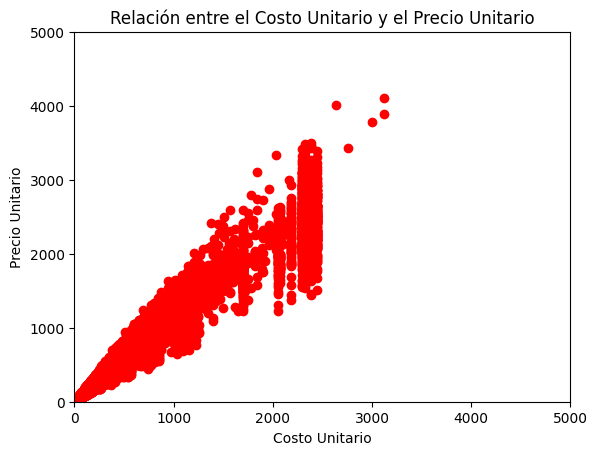

In [ ]:
plt.scatter(df['Unit Cost'], df['Unit Price'],color='r')
plt.xlabel('Costo Unitario')
plt.ylabel('Precio Unitario')
plt.title('Relación entre el Costo Unitario y el Precio Unitario')
plt.ylim(0, 5000); plt.xlim(0, 5000)
plt.show()

# 7. SELECCIÓN DE ALGORITMO DE MODELIZACIÓN

# Análisis de regresión univariado entre Precio de venta y Costo del producto
### Buscaré la relación entre las variables a través de una matriz de correlación y luego tomando precio y costo del producto buscaré la recta de regresión que modeliza la distribución de los datos. Se toma como fuente y se adapta a este caso lo dado en el último afterclass. INSIGTHS: existe una alta correlación 0,9 entre precio y costo unitario que justifica continuar el análisis de regresión.

<ipython-input-17-b1ce25ff4233>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion= df.corr().round(1)


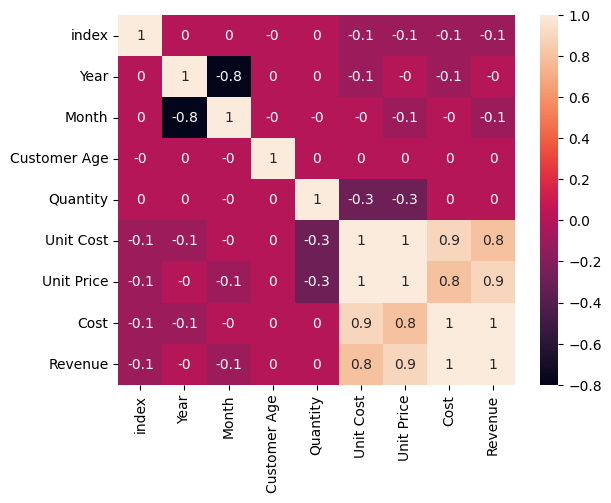

In [ ]:
matriz_correlacion= df.corr().round(1)
sns.heatmap(data=matriz_correlacion, annot=True)
plt.show()

## Se definen variables x independiente costo y variable y precio, se grafica la distribución y la recta de regresión

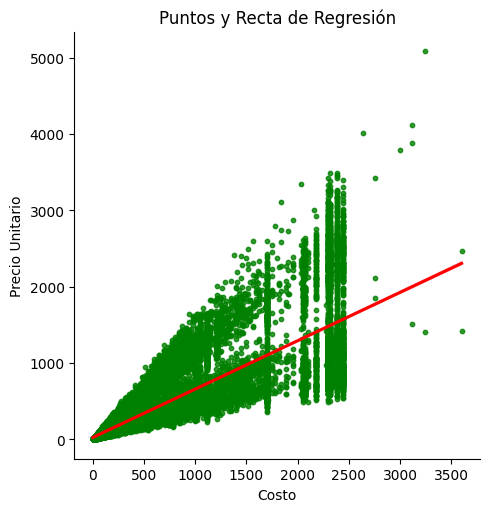

In [ ]:
#sns.lmplot      (data=df, x='Cost', y='Unit Price')
sns.lmplot      (data=df, x='Cost', y='Unit Price', \
                 scatter_kws = {'color': 'green', 's': 10}, line_kws = {'color': 'red'})

plt.title('Puntos y Recta de Regresión')
plt.xlabel('Costo')
plt.ylabel('Precio Unitario')
plt.show()

## Hago un "zoom" al origen

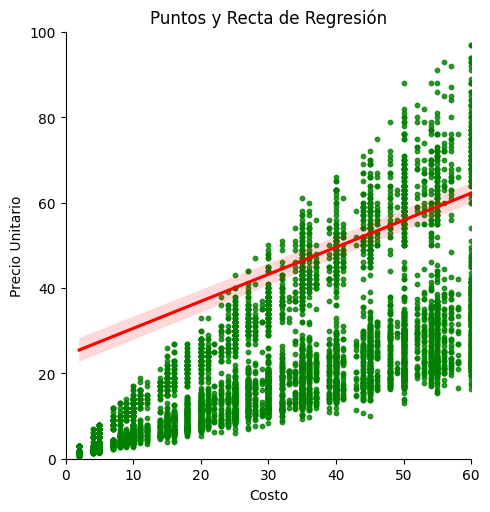

In [ ]:
sns.lmplot      (data=df, x='Cost', y='Unit Price', \
                 scatter_kws = {'color': 'green', 's': 10}, line_kws = {'color': 'red'})

plt.title('Puntos y Recta de Regresión')
plt.xlabel('Costo')
plt.ylabel('Precio Unitario')
plt.ylim(0, 100)
plt.xlim(0, 60)
plt.show()

# 8. DESARROLLO DEL ALGORITMO DEL MODELO DE REGRESIÓN

In [ ]:
from sklearn import datasets, linear_model
#X = data.drop('MEDV', axis = 1) #colocamos todas las variables menos la que quiero predecir (Walter after)
X = df['Cost'].values.reshape(-1, 1) # Hubo que corregir error de dimensiones cuando hay solo una x
Y = df['Unit Price'] #solo colocamos la variable que quiero predecir

modelo = linear_model.LinearRegression()
modelo.fit(X,Y)

LinearRegression()

## Parámetros de la recta de regresión y precisión del modelo

In [ ]:
print('Valor de las pendiente o coeficiente')
print(modelo.coef_[0].round(2))
print('Valor de la intersección')
print(modelo.intercept_.round(2))
print('Precisión de mi modelo')
print(modelo.score(X,Y).round(2))

Valor de las pendiente o coeficiente
0.63
Valor de la intersección
24.21
Precisión de mi modelo
0.69


# 9. INTERPRETACIÓN Y CONFIRMACIÓN DEl INSIGTH MAS IMPORTANTE
## Se nota que la intersección de la recta de regresión coincide con lo hallado en el gráfico anterior de "zoom" hallado con otro método y la pendiente es positiva de valor 0.63, lo cual demuestra que el precio de venta de la distribución de datos aumenta tan solo 0,63 pesos por cada 1$ de costo.



# 10. CONCLUSIONES

## Lo anterior confirma que el negocio en las condiciones analizadas es inviable, es decir si bien están vendiendo muchos productos, probablemente esto se deba a que su precio es extremadamente bajo. Por lo tanto la recomendación mas importante es que se aumenten los precios de ventas a por lo menos el doble de precio, lo cual si bien hará perder ventas, hará que la relación ganancia/costos evidenciada por la pendiente de la recta de regresión sea mayor que uno, permitiendo al negocio no solo sustentarse sino experimentar ganancias y crecimiento. Se reconoce que el aumento de precio recomendado constituye una medida urgente dada la magnitud del problema, sin embargo la cuantía del aumento requeriría de por si un análisis nuevo y más profundo, no contemplado en este estudio, con la posibilidad de contratar más tiempo o mas Data Scientists para llevarlo a cabo.

# ----------------------------------------------------------------------------




# ---------------------------------------------------------------------------

# 5. Lo que sigue se encuadra también dentro del EDA pero prefiero dejarlo como un anexo para no desdibujar el insigth encontrado anteriormente.

# Gráfico de Ingresos por cada venta

### Insigths: el eje x representa el monto por cada venta y el eje y es la frecuencia en que ocurren esos montos. Como la barra de frecuencia es mayor en x bajas indica que hay muchas transacciones de productos con bajo precio. Podria ser que el modelo de negocios esta orientado a la venta de productos a bajo precio.

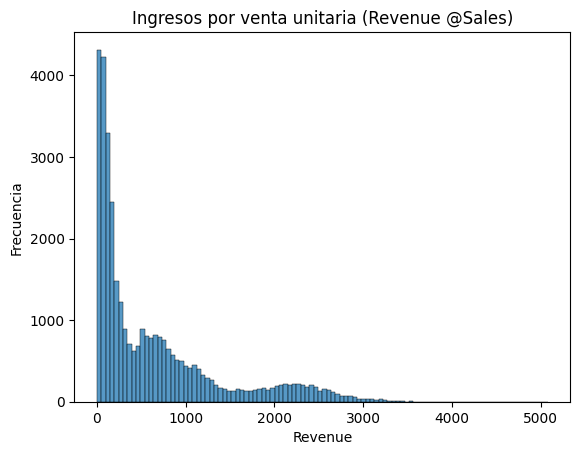

In [ ]:
# GRAFICO DE HISTOGRAMA CON SEABORN
col_numerica="Revenue"
sns.histplot(data = df, x = col_numerica)
plt.title('Ingresos por venta unitaria (Revenue @Sales)'); plt.xlabel('Revenue'); plt.ylabel('Frecuencia'); plt.show()


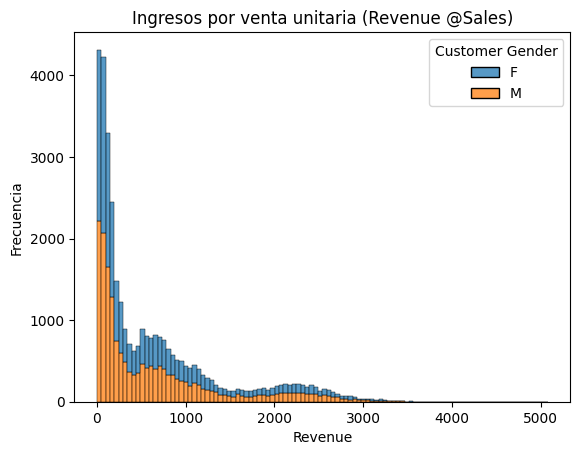

Hallazgo: idem grafico anterior y aunque se incluye el género del comprador, en este gráfico apilado no es posible discriminar claramente ni sacar alguna conclusión al respecto
           respecto a si hay alguna diferencia de compra entre los generos.


In [ ]:
# GRAFICO DE HISTOGRAMA CON SEABORN ANALIZANDO GENERO
col_numerica="Revenue"
sns.histplot(data = df, x = col_numerica,hue='Customer Gender', multiple="stack" )
plt.title('Ingresos por venta unitaria (Revenue @Sales)'); plt.xlabel('Revenue'); plt.ylabel('Frecuencia'); plt.show()

print('Hallazgo: idem grafico anterior y aunque se incluye el género del comprador, en este gráfico apilado no es posible discriminar claramente ni sacar alguna conclusión al respecto')
print('           respecto a si hay alguna diferencia de compra entre los generos.')

Hallazgo: separando los gráficos por género del comprador, se observa la similitud en las compras que realizan cualquiera de los dos géneros
 la conclusión seria que nada indica que uno de los dos generos compra articulos mas caros o mas baratos que el otro.
 Este hallazgo me sorprende, que sigan la misma forma los M y los F sería demasiada casualidad, me hace pensar que tal vez el dataset fue armado y no sea uno de ventas reales
 Sé que hay herramientas estadísticas para determinar eso y si las vamos a usar me gustaría volver sobre este dataset y analizar si es real o artificial.


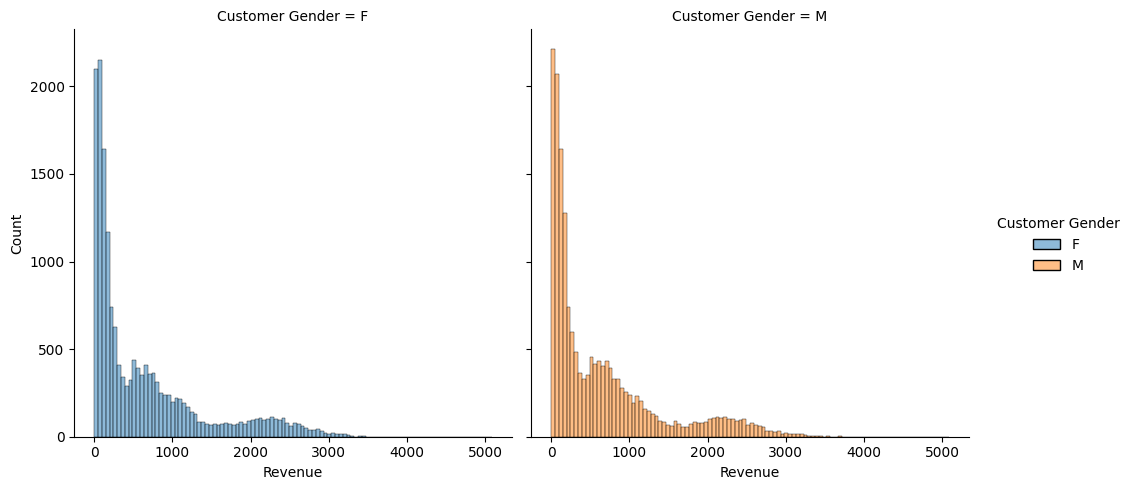

In [ ]:
# GRAFICOS DE HISTOGRAMAS SEPARADOS CON SEABORN
sns.displot(data=df, x="Revenue", hue="Customer Gender", col="Customer Gender")

print('Hallazgo: separando los gráficos por género del comprador, se observa la similitud en las compras que realizan cualquiera de los dos géneros')
print(' la conclusión seria que nada indica que uno de los dos generos compra articulos mas caros o mas baratos que el otro.')
print(' Este hallazgo me sorprende, que sigan la misma forma los M y los F sería demasiada casualidad, me hace pensar que tal vez el dataset fue armado y no sea uno de ventas reales')
print(' Sé que hay herramientas estadísticas para determinar eso y si las vamos a usar me gustaría volver sobre este dataset y analizar si es real o artificial.')

Hallazgo: separando los gráficos por género del comprador y teniendo en cuenta los tipos de productos, se observa la similitud en las compras que realizan cualquiera de los dos géneros
 la conclusión seria que nada indica que uno de los dos generos compra articulos mas caros o mas baratos que el otro ni alguna preferencia de un tipo de artículo sobre otro .


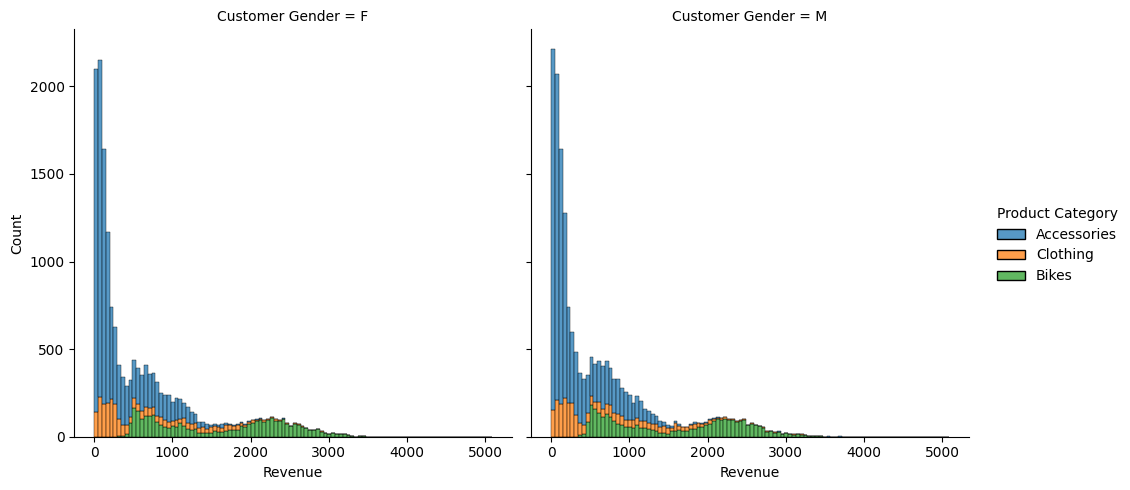

In [ ]:
# GRAFICOS DE HISTOGRAMAS SEPARADOS CON SEABORN
sns.displot(data=df, x="Revenue", col="Customer Gender", hue="Product Category",multiple='stack')

print('Hallazgo: separando los gráficos por género del comprador y teniendo en cuenta los tipos de productos, se observa la similitud en las compras que realizan cualquiera de los dos géneros')
print(' la conclusión seria que nada indica que uno de los dos generos compra articulos mas caros o mas baratos que el otro ni alguna preferencia de un tipo de artículo sobre otro .')

INSIGTHS: en el gráfico de dispersión de las variable Edad vs Ingresos unitarios no se observa nada parecido a una recta que vincule ambas variables
 la conclusión seria que no existe absolutamente ninguna relacion entre la edad y el monto gastado en cada compra


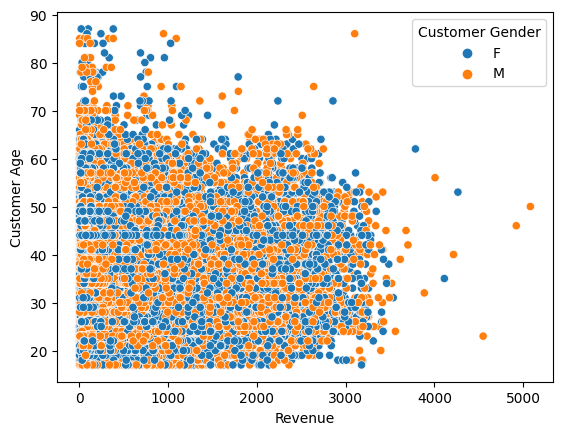

In [ ]:
# GRAFICOS DE DISPERSIÓN DE DOS VARIABLES NUMERICAS CON SEABORN
sns.scatterplot(data=df, x="Revenue", y="Customer Age", hue="Customer Gender")


print('INSIGTHS: en el gráfico de dispersión de las variable Edad vs Ingresos unitarios no se observa nada parecido a una recta que vincule ambas variables\n\
 la conclusión seria que no existe absolutamente ninguna relacion entre la edad y el monto gastado en cada compra')

